# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
df1=pd.read_csv("C:\\Users\\parag\\Downloads\\jaipur_house_prices.csv")

In [5]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Vaishali Nagar,2 BHK,Shyam Residency,1638,4,2,75.00
1,Plot Area,Under Construction,Mansarovar Ext.,2 BHK,Raj Villas,2021,3,3,55.00
2,Built-up Area,Ready To Move,Ajmer Road,2 BHK,Green Meadows,1354,1,1,120.00
3,Carpet Area,Ready To Move,Hanuman Nagar,4 BHK,City Heights,1958,4,1,250.00
4,Super built-up Area,Under Construction,Manchwa,1 BHK,Royal Enclave,3613,5,3,80.00
...,...,...,...,...,...,...,...,...,...
9995,Super built-up Area,Ready To Move,Hanuman Nagar,5 BHK,Park View,2679,4,3,390.42
9996,Carpet Area,Ready To Move,Jawahar Nagar,3 BHK,Shyam Residency,2042,4,3,101.60
9997,Built-up Area,Ready To Move,Parasrampuri,1 BHK,Cosmopolitan Society,1589,1,0,231.56
9998,Super built-up Area,Under Construction,Civil Lines,3 BHK,Emerald Greens,2062,2,2,80.04


In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Vaishali Nagar,2 BHK,Shyam Residency,1638,4,2,75.0
1,Plot Area,Under Construction,Mansarovar Ext.,2 BHK,Raj Villas,2021,3,3,55.0
2,Built-up Area,Ready To Move,Ajmer Road,2 BHK,Green Meadows,1354,1,1,120.0
3,Carpet Area,Ready To Move,Hanuman Nagar,4 BHK,City Heights,1958,4,1,250.0
4,Super built-up Area,Under Construction,Manchwa,1 BHK,Royal Enclave,3613,5,3,80.0


In [7]:
df1.shape

(10000, 9)

In [8]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up Area          1915
Carpet Area            1003
Plot Area              3086
Super built-up Area    3996
Name: area_type, dtype: int64

In [9]:
df2=df1.drop(["area_type","society","balcony","availability"],axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Vaishali Nagar,2 BHK,1638,4,75.0
1,Mansarovar Ext.,2 BHK,2021,3,55.0
2,Ajmer Road,2 BHK,1354,1,120.0
3,Hanuman Nagar,4 BHK,1958,4,250.0
4,Manchwa,1 BHK,3613,5,80.0


In [10]:
df2.isnull().sum()  # there is no null values in any column

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2["size"].unique()

array(['2 BHK', '4 BHK', '1 BHK', '3 BHK', '5 BHK'], dtype=object)

In [12]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and x.split()[0].isdigit() else None)

In [13]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Vaishali Nagar,2 BHK,1638,4,75.0,2
1,Mansarovar Ext.,2 BHK,2021,3,55.0,2
2,Ajmer Road,2 BHK,1354,1,120.0,2
3,Hanuman Nagar,4 BHK,1958,4,250.0,4
4,Manchwa,1 BHK,3613,5,80.0,1


In [14]:
df2["BHK"].unique()

array([2, 4, 1, 3, 5], dtype=int64)

In [24]:
df2["total_sqft"].unique()

array([1638, 2021, 1354, ..., 3257, 4804, 2042], dtype=int64)

In [28]:
df3=df2.copy()
df3["price_per_sqft"]=df3["price"]*100000/df3["total_sqft"]
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Vaishali Nagar,2 BHK,1638,4,75.0,2,4578.754579
1,Mansarovar Ext.,2 BHK,2021,3,55.0,2,2721.425037
2,Ajmer Road,2 BHK,1354,1,120.0,2,8862.629247
3,Hanuman Nagar,4 BHK,1958,4,250.0,4,12768.130746
4,Manchwa,1 BHK,3613,5,80.0,1,2214.226405


In [31]:
len(df3.location.unique())

20

In [33]:
location_counts = df3['location'].value_counts()
df3['location_encoded'] = df3['location'].map(location_counts)


In [35]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,location_encoded
0,Vaishali Nagar,2 BHK,1638,4,75.0,2,4578.754579,453
1,Mansarovar Ext.,2 BHK,2021,3,55.0,2,2721.425037,480
2,Ajmer Road,2 BHK,1354,1,120.0,2,8862.629247,496
3,Hanuman Nagar,4 BHK,1958,4,250.0,4,12768.130746,504
4,Manchwa,1 BHK,3613,5,80.0,1,2214.226405,477


In [37]:
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df4 = df3[(df3['price'] >= lower_bound) & (df3['price'] <= upper_bound)]

In [39]:
df4.shape

(9742, 8)

In [41]:
df3.shape

(10000, 8)

In [43]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(8617, 8)

In [45]:
df5.head(50)

,location,size,total_sqft,bath,price,BHK,price_per_sqft,location_encoded
0,Vaishali Nagar,2 BHK,1638,4,75.00,2,4578.754579,453
1,Mansarovar Ext.,2 BHK,2021,3,55.00,2,2721.425037,480
2,Ajmer Road,2 BHK,1354,1,120.00,2,8862.629247,496
3,Hanuman Nagar,4 BHK,1958,4,250.00,4,12768.130746,504
4,Manchwa,1 BHK,3613,5,80.00,1,2214.226405,477
5,Raja Park,4 BHK,2477,2,95.00,4,3835.284618,489
6,Brahmpuri,4 BHK,1763,5,150.00,4,8508.224617,495
7,Parasrampuri,4 BHK,2165,2,45.00,4,2078.521940,522
8,Sita Vihar,3 BHK,3907,1,60.00,3,1535.705145,481
9,Dahar Ka Balaji,3 BHK,3249,1,85.00,3,2616.189597,517


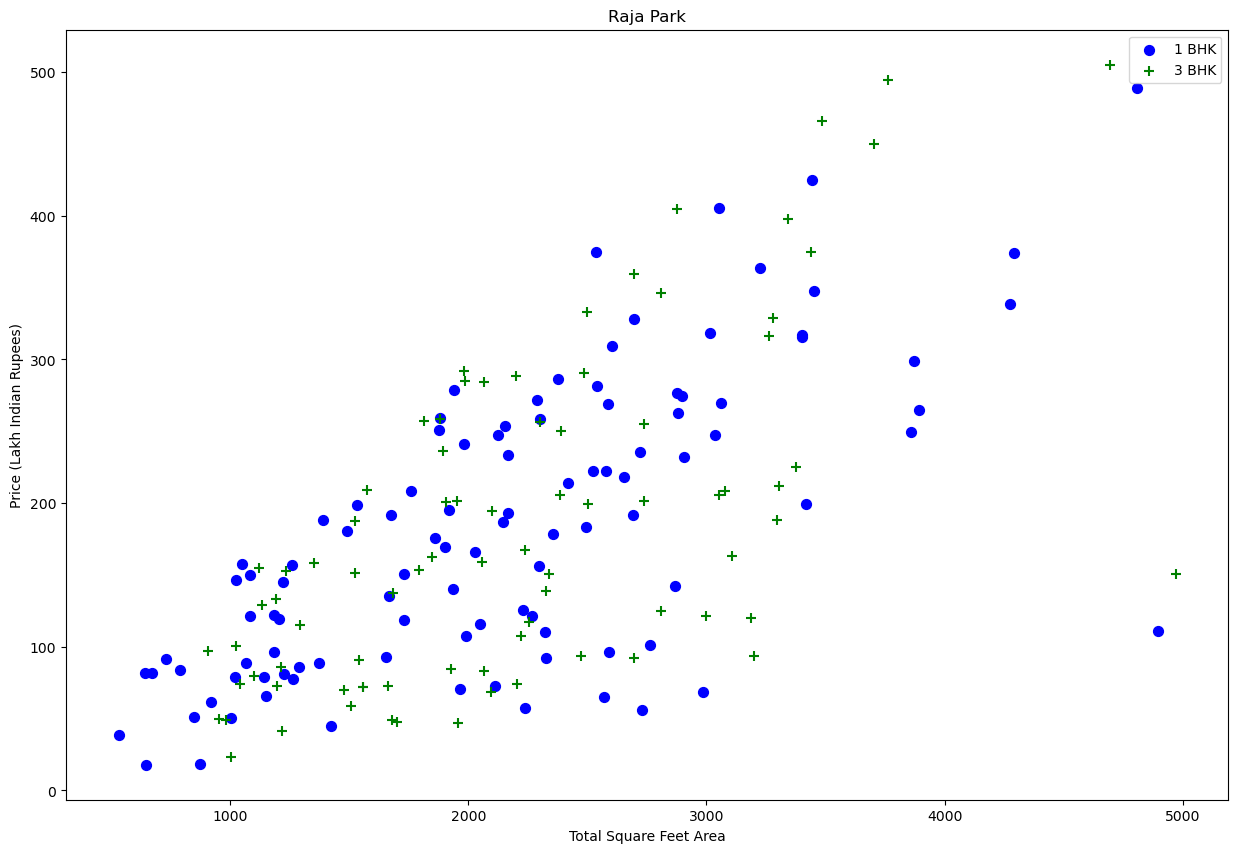

In [47]:
import matplotlib.pyplot as plt
import matplotlib
def plot_scatter_chart(df5,location):
    BHK1 = df5[(df5.location==location) & (df5.BHK==1)]
    BHK3 = df5[(df5.location==location) & (df5.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK1.total_sqft,BHK1.price,color='blue',label='1 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Raja Park")
    

In [48]:
def remove_BHK_outliers(df5):
    BHK_stats = {}  

    for BHK, BHK_df5 in df5.groupby('BHK'):  
        BHK_stats[BHK] = {
            'mean': np.mean(BHK_df5.price_per_sqft),
            'std': np.std(BHK_df5.price_per_sqft),
            'count': BHK_df5.shape[0]
        }

    exclude_indices = np.array([])

    for BHK, BHK_df5 in df5.groupby('BHK'):
        stats = BHK_stats.get(BHK - 1)  

        if stats and stats['count'] > 5:  
            exclude_indices = np.append(
                exclude_indices, 
                BHK_df5[BHK_df5.price_per_sqft < stats['mean']].index.values
            )

    return df5.drop(exclude_indices, axis='index')

df6 = remove_BHK_outliers(df5)  
df6.shape  

(5258, 8)

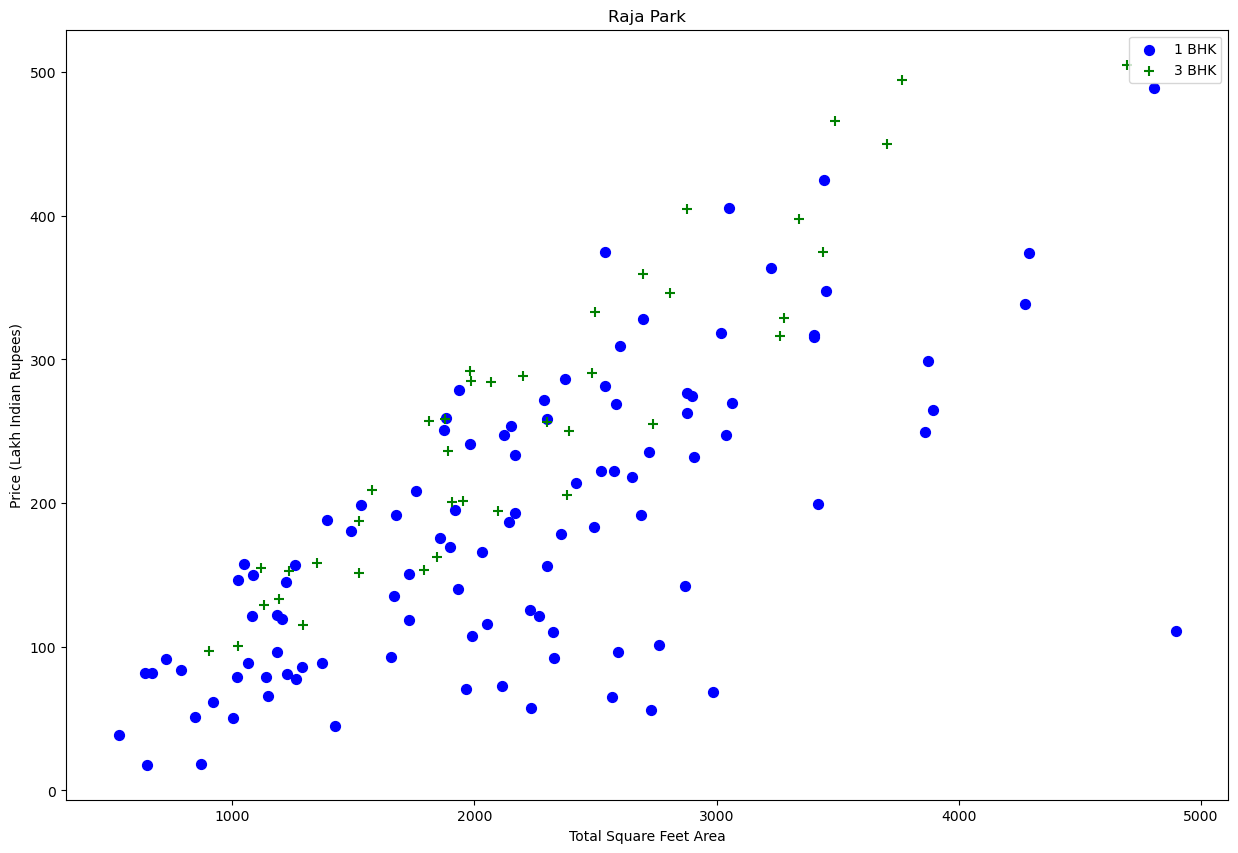

In [49]:
plot_scatter_chart(df6,"Raja Park")

Text(0, 0.5, 'Count')

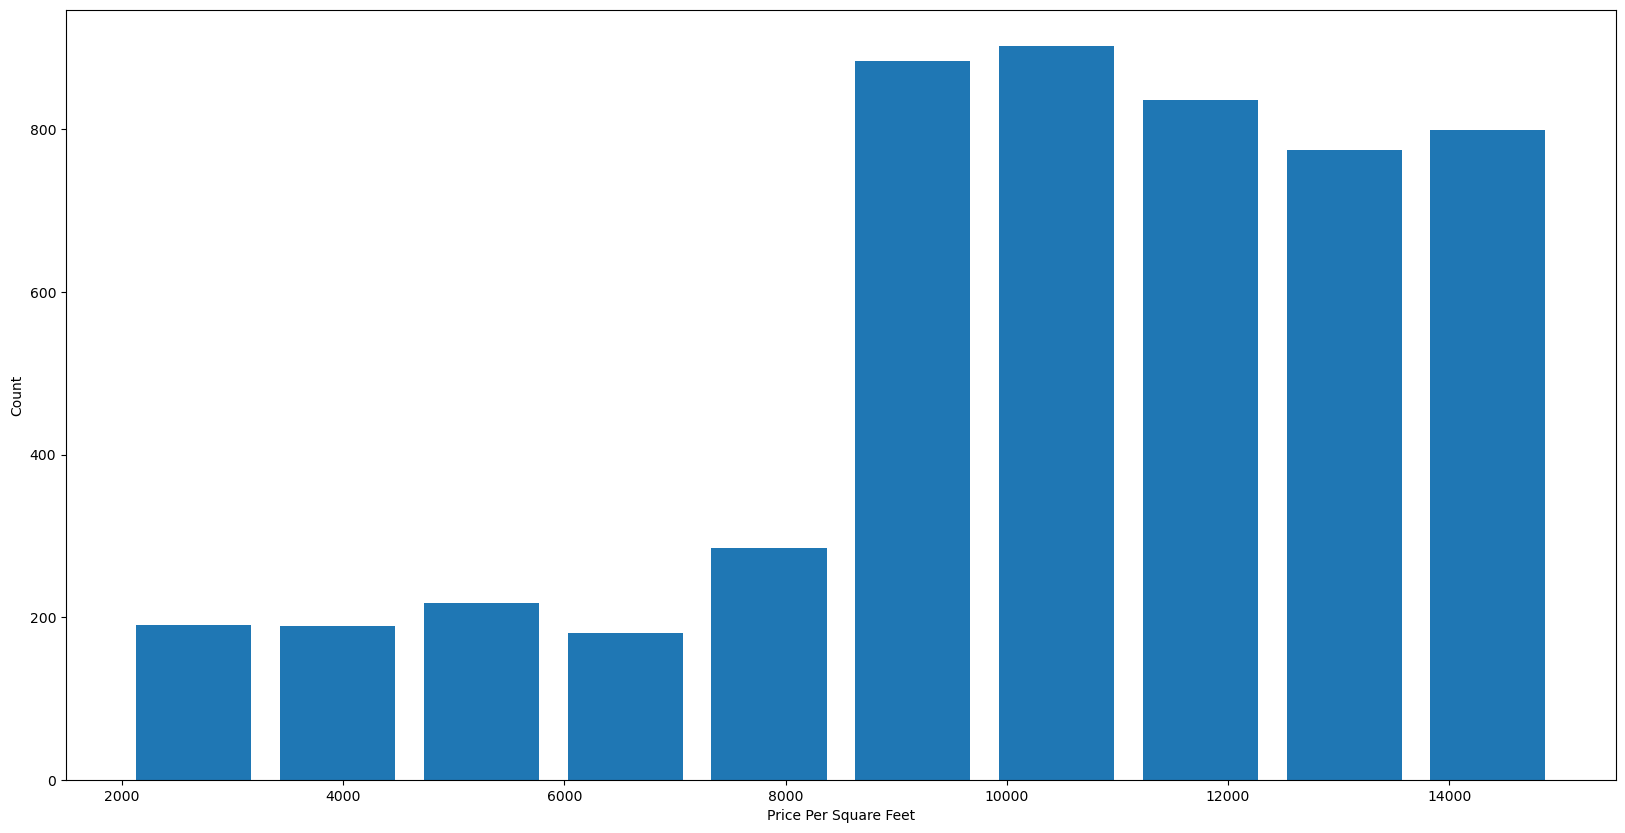

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
df6.bath.unique()

array([1, 4, 5, 3, 2], dtype=int64)

Text(0, 0.5, 'Count')

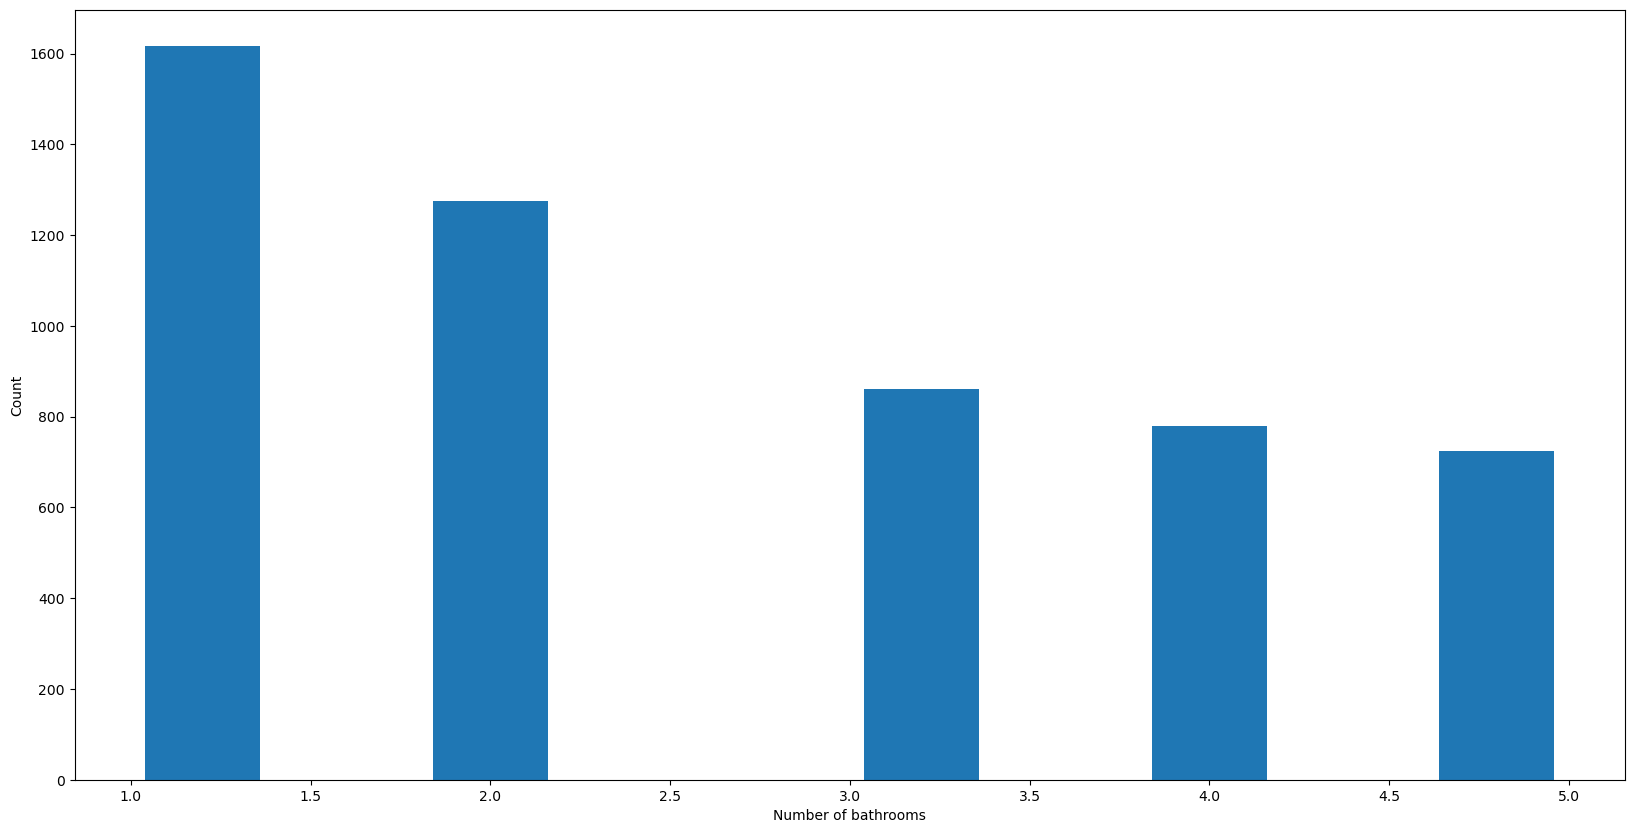

In [54]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [56]:
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft,location_encoded
4,Manchwa,1 BHK,3613,5,80.0,1,2214.226405,477


In [59]:
df7=df6[df6.bath<df6.BHK+2]
df7.shape

(5257, 8)

In [60]:
df8 = df7.drop(['size','price_per_sqft',"location_encoded"],axis='columns')
df8.head()

,location,total_sqft,bath,price,BHK
2,Ajmer Road,1354,1,120.00,2
3,Hanuman Nagar,1958,4,250.00,4
6,Brahmpuri,1763,5,150.00,4
20,Raja Park,648,1,17.88,1
23,Shyam Nagar,3371,3,327.44,4


In [61]:
dummies=pd.get_dummies(df8.location).astype(int)
dummies.head()

,Ajmer Road,Bapu Nagar,Brahmpuri,Chokdi Gangapol,Civil Lines,Dahar Ka Balaji,Gandhi Path West,Hanuman Nagar,Jawahar Nagar,Malviya Nagar,Manchwa,Maniyawas,Mansarovar Ext.,Parasrampuri,Raja Park,Shyam Nagar,Sirsi,Sita Vihar,Tagore Nagar,Vaishali Nagar
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
df9= pd.concat([df8,dummies],axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK,Ajmer Road,Bapu Nagar,Brahmpuri,Chokdi Gangapol,Civil Lines,...,Manchwa,Maniyawas,Mansarovar Ext.,Parasrampuri,Raja Park,Shyam Nagar,Sirsi,Sita Vihar,Tagore Nagar,Vaishali Nagar
2,Ajmer Road,1354,1,120.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hanuman Nagar,1958,4,250.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Brahmpuri,1763,5,150.00,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,Raja Park,648,1,17.88,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,Shyam Nagar,3371,3,327.44,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
df10=df9.drop("location",axis="columns")
df10.head()

,total_sqft,bath,price,BHK,Ajmer Road,Bapu Nagar,Brahmpuri,Chokdi Gangapol,Civil Lines,Dahar Ka Balaji,...,Manchwa,Maniyawas,Mansarovar Ext.,Parasrampuri,Raja Park,Shyam Nagar,Sirsi,Sita Vihar,Tagore Nagar,Vaishali Nagar
2,1354,1,120.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1958,4,250.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1763,5,150.00,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,648,1,17.88,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,3371,3,327.44,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
df10.shape

(5257, 24)

In [73]:
A=df10.drop("price",axis="columns")
A.head()

,total_sqft,bath,BHK,Ajmer Road,Bapu Nagar,Brahmpuri,Chokdi Gangapol,Civil Lines,Dahar Ka Balaji,Gandhi Path West,...,Manchwa,Maniyawas,Mansarovar Ext.,Parasrampuri,Raja Park,Shyam Nagar,Sirsi,Sita Vihar,Tagore Nagar,Vaishali Nagar
2,1354,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1958,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1763,5,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,648,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,3371,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
B=df10.price
B.head()

2     120.00
3     250.00
6     150.00
20     17.88
23    327.44
Name: price, dtype: float64

In [77]:
X = df10.drop(columns=['price'])
y = df10['price']  

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [78]:
pip install xgboost

In [80]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6421139112330645

In [81]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [82]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Store model performance
results = {
    "Linear Regression": evaluate_model(y_test, y_pred_lr),
    "Random Forest": evaluate_model(y_test, y_pred_rf),
    "XGBoost": evaluate_model(y_test, y_pred_xgb),
}

# Display evaluation results
for model, scores in results.items():
    print(f"{model}: MAE={scores['MAE']:.2f}, RMSE={scores['RMSE']:.2f}, R²={scores['R² Score']:.2f}")

Linear Regression: MAE=51.23, RMSE=68.13, R²=0.64
Random Forest: MAE=49.89, RMSE=66.44, R²=0.66
XGBoost: MAE=50.16, RMSE=66.78, R²=0.66


In [83]:
X.columns

Index(['total_sqft', 'bath', 'BHK', 'Ajmer Road', 'Bapu Nagar', 'Brahmpuri',
       'Chokdi Gangapol', 'Civil Lines', 'Dahar Ka Balaji', 'Gandhi Path West',
       'Hanuman Nagar', 'Jawahar Nagar', 'Malviya Nagar', 'Manchwa',
       'Maniyawas', 'Mansarovar Ext.', 'Parasrampuri', 'Raja Park',
       'Shyam Nagar', 'Sirsi', 'Sita Vihar', 'Tagore Nagar', 'Vaishali Nagar'],
      dtype='object')

In [84]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return xgb.predict([x])[0]

In [85]:
predict_price("Bapu Nagar",1000,2,2)

126.180534

In [86]:
predict_price("Bapu Nagar",1000,2,3)

125.07848

In [87]:
predict_price("Vaishali Nagar",1000,2,2)

122.26414

In [89]:
predict_price("Vaishali Nagar",1000,2,3)

121.16209

In [90]:
# Assume an average real estate appreciation rate of 7% per year
annual_growth_rate = 0.07

# Function to calculate future property price
def calculate_future_price(current_price, years, rate=annual_growth_rate):
    return current_price * ((1 + rate) ** years)

# Predict ROI for different timeframes (5, 10, 15 years)
df10['ROI_5_years'] = df10['price'].apply(lambda x: calculate_future_price(x, 5))
df10['ROI_10_years'] = df10['price'].apply(lambda x: calculate_future_price(x, 10))
df10['ROI_15_years'] = df10['price'].apply(lambda x: calculate_future_price(x, 15))

# Display sample ROI predictions
df10[['price', 'ROI_5_years', 'ROI_10_years', 'ROI_15_years']].head()

,price,ROI_5_years,ROI_10_years,ROI_15_years
2,120.00,168.306208,236.058163,331.083785
3,250.00,350.637933,491.787839,689.757885
6,150.00,210.382760,295.072704,413.854731
20,17.88,25.077625,35.172666,49.331484
23,327.44,459.251539,644.124040,903.417288


In [91]:
# Simulating Environmental Data (Assumed values, replace with real sources if available)
np.random.seed(42)
df10["Air_Quality_Index"] = np.random.randint(50, 200, df10.shape[0])  # AQI Values
df10["Noise_Pollution_Level"] = np.random.randint(30, 90, df10.shape[0])  # Noise in dB
df10["Green_Space_Percentage"] = np.random.uniform(5, 30, df10.shape[0])  # Percentage of Green Cover

# Display environmental data
df10[["price", "Air_Quality_Index", "Noise_Pollution_Level", "Green_Space_Percentage"]].head()

,price,Air_Quality_Index,Noise_Pollution_Level,Green_Space_Percentage
2,120.00,152,86,18.164874
3,250.00,142,67,12.582026
6,150.00,64,35,14.064580
20,17.88,156,74,6.660134
23,327.44,121,40,29.733738


In [92]:
import pickle
with open('Jaipur_real_estate_model.pickle','wb') as f:
    pickle.dump(xgb,f)

In [94]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))